In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [8]:
df = pd.read_csv("Data.csv")

In [9]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
df.shape

(244, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [12]:
for column in df.columns:
  print(f"Distribution of data in column '{column}':")
  print(df[column].value_counts(normalize=True) * 100)  # Percentage distribution
  print("-" * 20)

Distribution of data in column 'total_bill':
total_bill
13.42    1.229508
13.81    0.819672
15.98    0.819672
17.92    0.819672
10.07    0.819672
           ...   
24.71    0.409836
21.16    0.409836
28.97    0.409836
22.49    0.409836
18.78    0.409836
Name: proportion, Length: 229, dtype: float64
--------------------
Distribution of data in column 'tip':
tip
2.00    13.524590
3.00     9.426230
4.00     4.918033
5.00     4.098361
2.50     4.098361
          ...    
4.34     0.409836
1.56     0.409836
5.20     0.409836
2.60     0.409836
1.75     0.409836
Name: proportion, Length: 123, dtype: float64
--------------------
Distribution of data in column 'sex':
sex
Male      64.344262
Female    35.655738
Name: proportion, dtype: float64
--------------------
Distribution of data in column 'smoker':
smoker
No     61.885246
Yes    38.114754
Name: proportion, dtype: float64
--------------------
Distribution of data in column 'day':
day
Sat     35.655738
Sun     31.147541
Thur    25.409836
Fri 

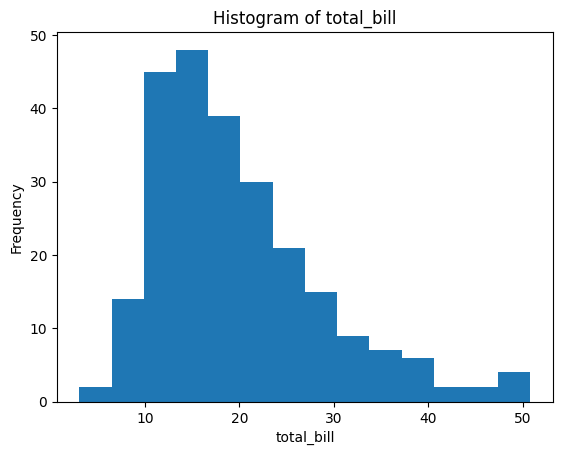

In [13]:
column_name = 'total_bill'

plt.hist(df[column_name], bins='auto')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')
plt.show()

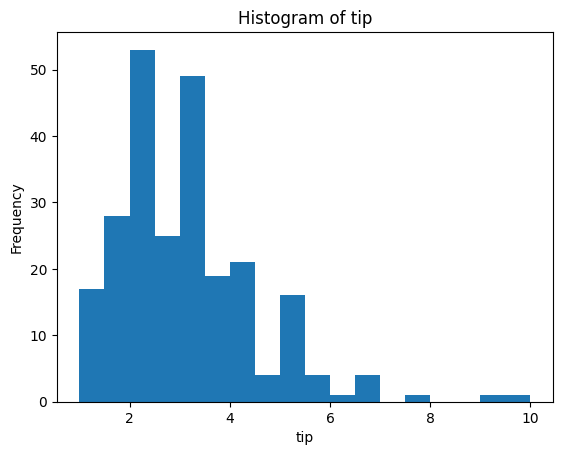

In [14]:
column_name = 'tip'

plt.hist(df[column_name], bins='auto')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')
plt.show()

In [15]:
label_encoders = {}

for column in ['sex', 'smoker', 'day', 'time']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

print(df.head())

   total_bill   tip  sex  smoker  day  time  size
0       16.99  1.01    0       0    2     0     2
1       10.34  1.66    1       0    2     0     3
2       21.01  3.50    1       0    2     0     3
3       23.68  3.31    1       0    2     0     2
4       24.59  3.61    0       0    2     0     4


In [16]:
X = df.drop(columns=['tip'])
y = df['tip']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
models = {
    'Linear Regression': LinearRegression(fit_intercept=True),
    'Ridge Regression': Ridge(alpha=1.0, solver='auto', max_iter=1000),
    'Lasso Regression': Lasso(alpha=0.1, max_iter=1000, tol=0.0001),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_split=5, min_samples_leaf=2),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=None, min_samples_split=2, min_samples_leaf=1),
    'Support Vector Regression (SVR)': SVR(kernel='rbf', C=1.0, epsilon=0.1),
    'K-Nearest Neighbors (KNN)': KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30)
}

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
results = {}
for name, model in models.items():
    # Use scaled data for SVR and KNN, otherwise use original data
    if name in ['Support Vector Regression (SVR)', 'K-Nearest Neighbors (KNN)']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2 Score': r2}

In [33]:
results_df = pd.DataFrame(results).T
print("Model Performance:\n", results_df.sort_values(by='R2 Score', ascending=False))


Model Performance:
                                       MAE       MSE      RMSE  R2 Score
Lasso Regression                 0.637484  0.590853  0.768670  0.527307
Ridge Regression                 0.669679  0.692749  0.832316  0.445788
Linear Regression                0.670381  0.694813  0.833554  0.444137
Support Vector Regression (SVR)  0.662227  0.717650  0.847142  0.425867
K-Nearest Neighbors (KNN)        0.748571  0.809422  0.899679  0.352448
Random Forest                    0.775051  0.962561  0.981102  0.229934
Decision Tree                    0.826570  1.186733  1.089373  0.050592


Lasso Regression can be used for given Dataset

In [23]:
for model_name in ['Linear Regression', 'Lasso Regression']:
    model = models[model_name]
    if model_name in ['Support Vector Regression (SVR)', 'K-Nearest Neighbors (KNN)']:
        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train, y_train)
    coefficients = model.coef_ if model_name == 'Linear Regression' else model.coef_
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': coefficients
    }).sort_values(by='Importance', ascending=False)
    print(f"\n{model_name} Feature Importances:\n", feature_importance)


Linear Regression Feature Importances:
       Feature  Importance
5        size    0.240303
0  total_bill    0.093965
4        time    0.061226
1         sex    0.032710
3         day   -0.006830
2      smoker   -0.191744

Lasso Regression Feature Importances:
       Feature  Importance
5        size    0.108081
0  total_bill    0.099099
1         sex    0.000000
2      smoker   -0.000000
3         day    0.000000
4        time    0.000000


Scatter Plot

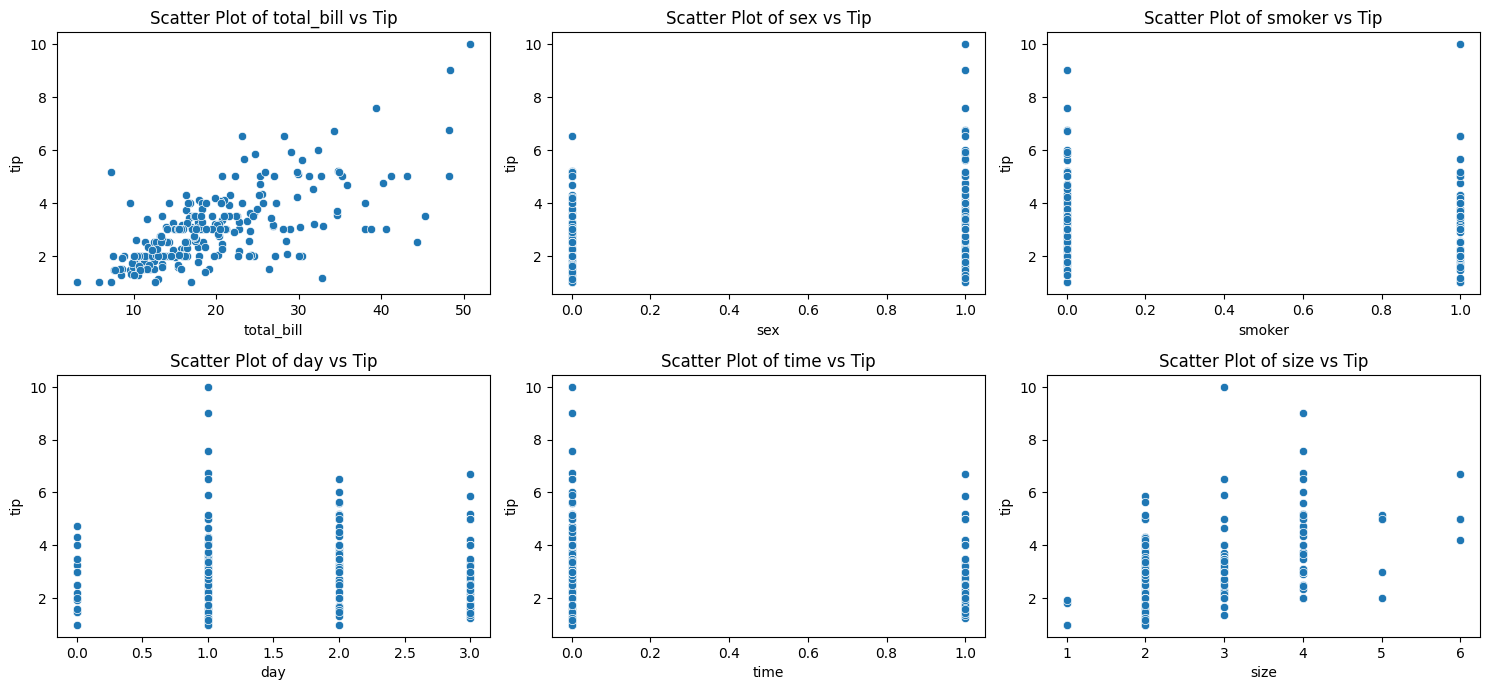

In [24]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(X, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x=column, y='tip')
    plt.title(f'Scatter Plot of {column} vs Tip')

plt.tight_layout()
plt.show()

Pair Plot

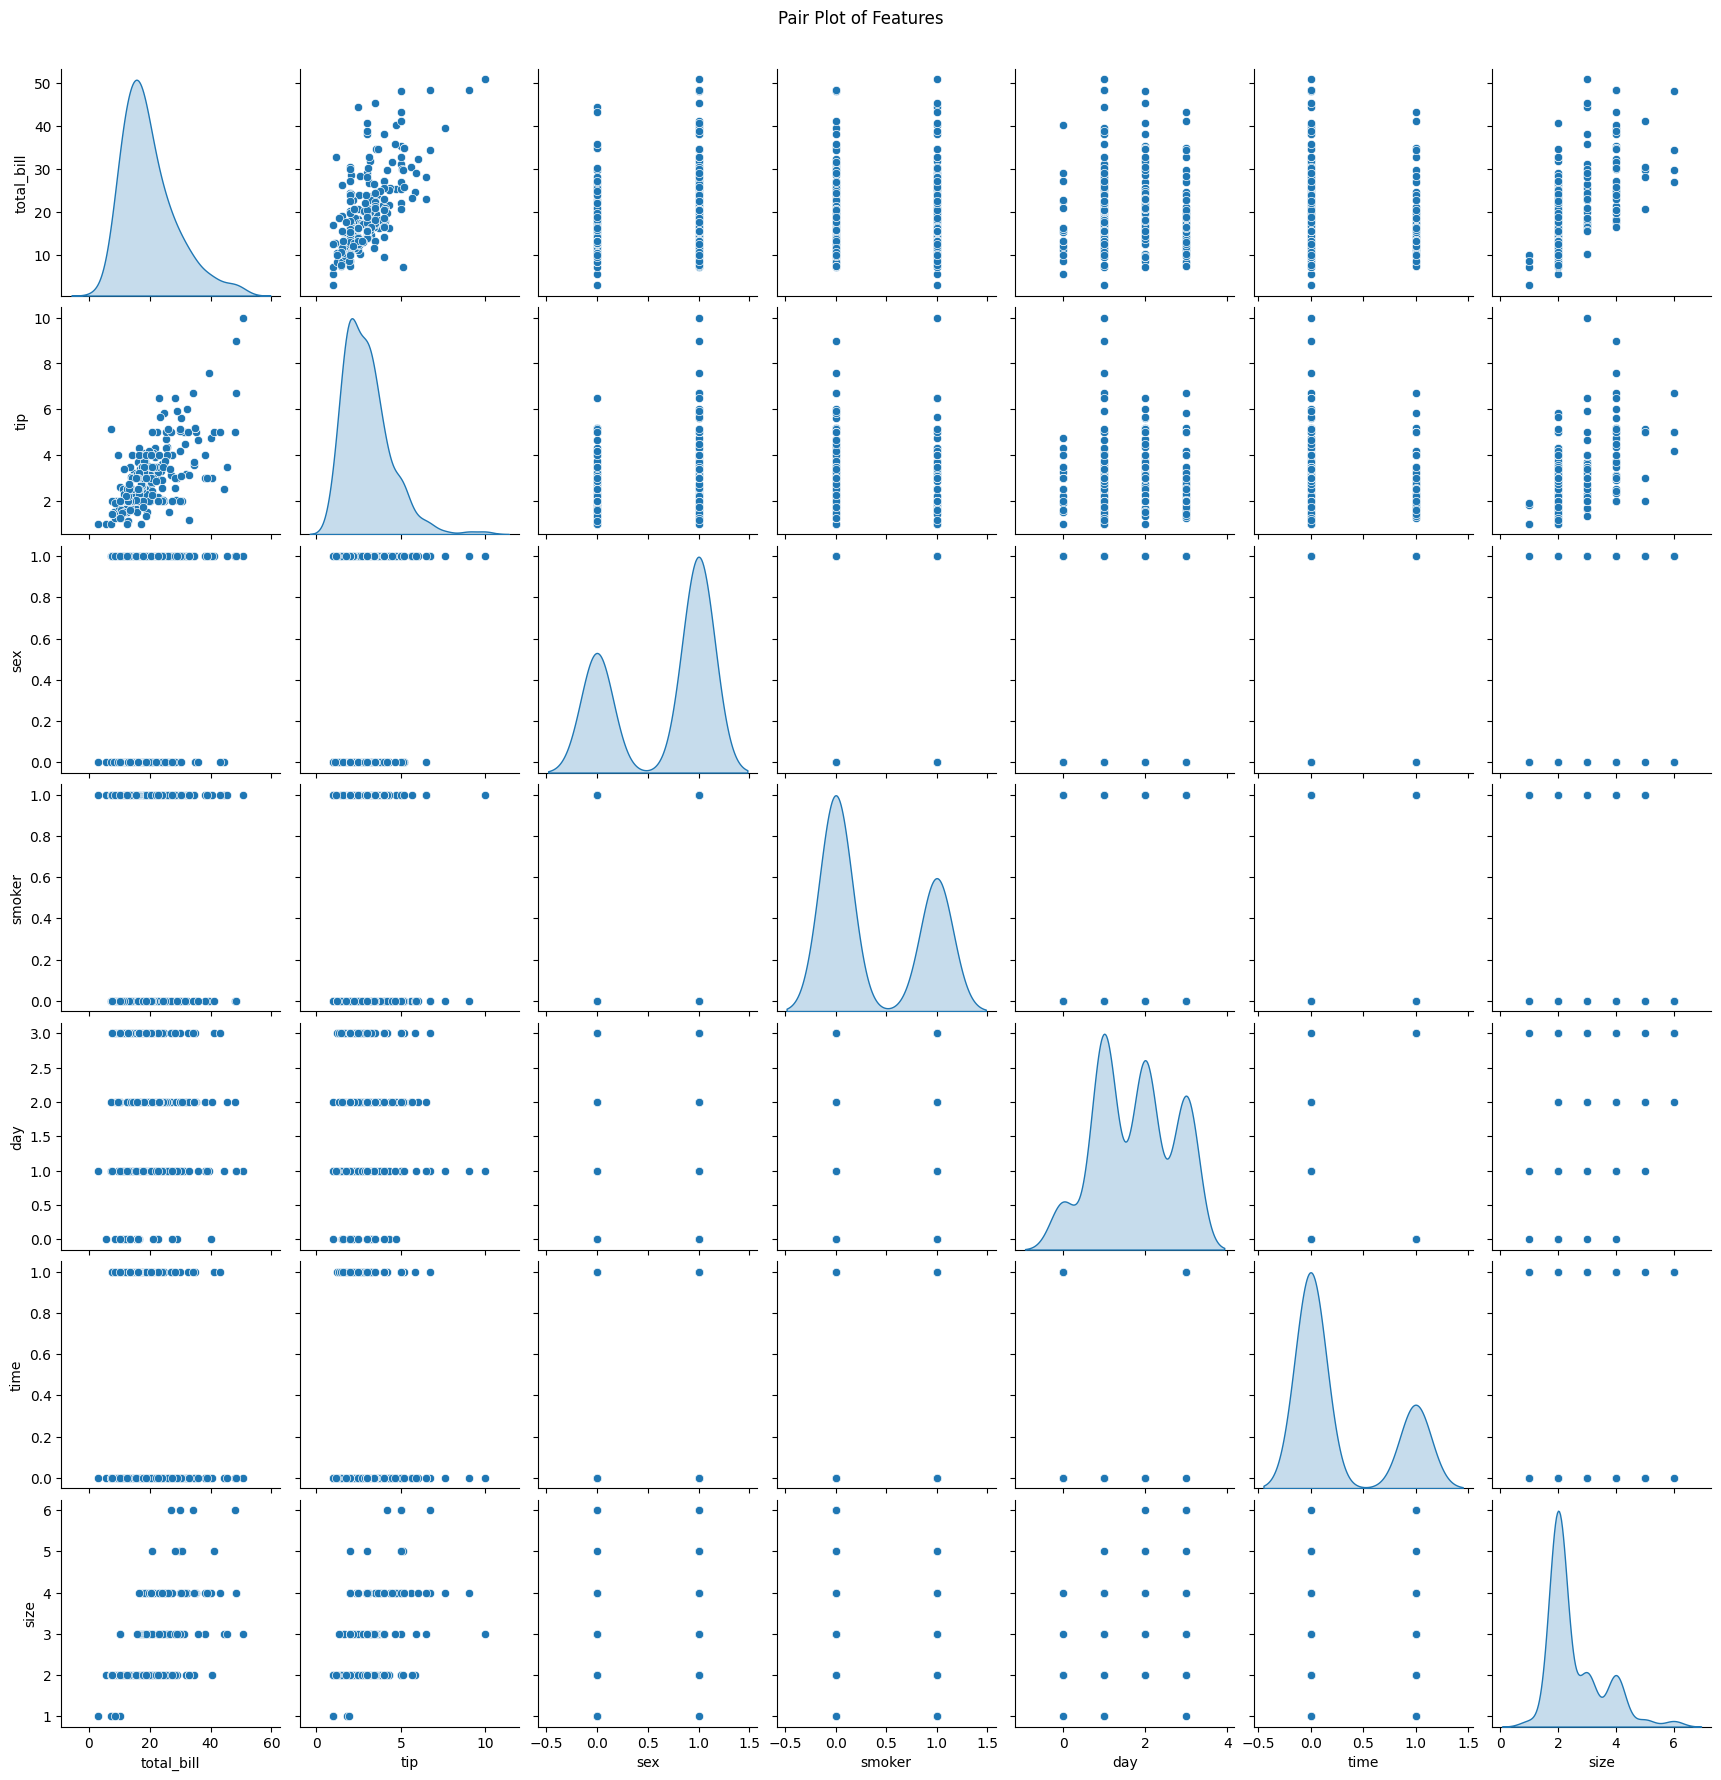

In [25]:
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()

Correlation Matrix

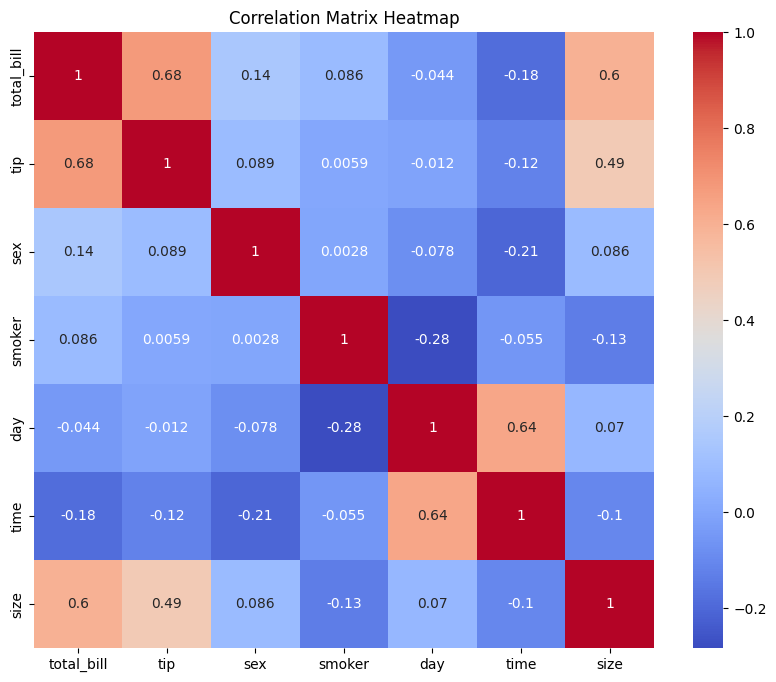

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [27]:
X_with_constant = sm.add_constant(X)
linear_model = sm.OLS(y, X_with_constant).fit()
rainbow_statistic, rainbow_p_value = linear_rainbow(linear_model)

print("Rainbow Test Statistic:", rainbow_statistic)
print("Rainbow Test p-value:", rainbow_p_value)
if rainbow_p_value < 0.05:
    print("Rainbow Test suggests non-linearity.")
else:
    print("Rainbow Test does not suggest non-linearity.")

Rainbow Test Statistic: 1.2036274510126597
Rainbow Test p-value: 0.15798464222013167
Rainbow Test does not suggest non-linearity.


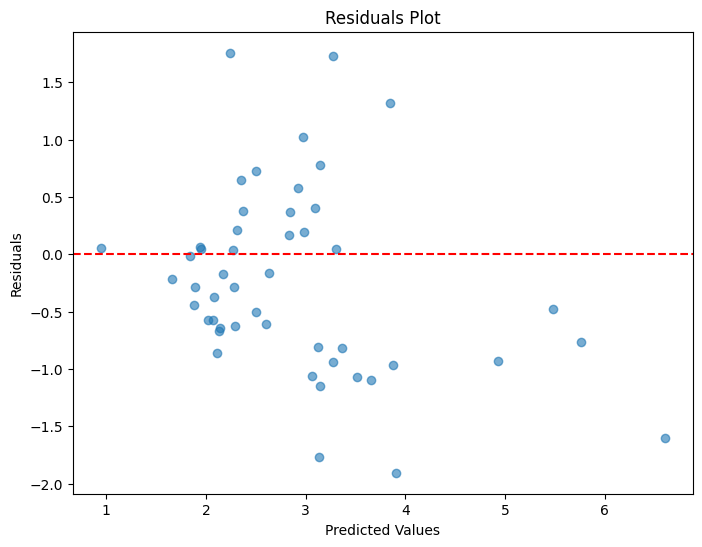

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

Line Plot

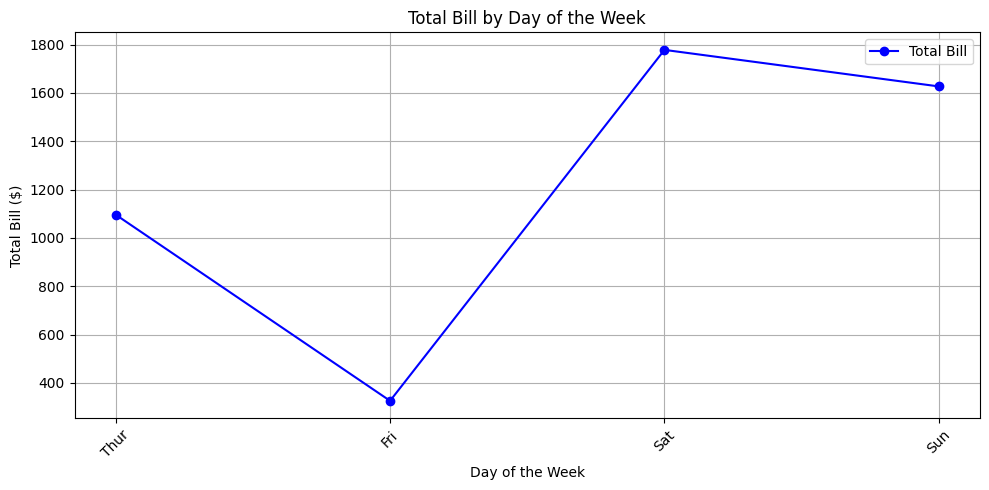

In [29]:
data = pd.read_csv('Data.csv')

aggregated_data = data.groupby('day')['total_bill'].sum().reset_index()

days_order = ['Thur', 'Fri', 'Sat', 'Sun']
aggregated_data['day'] = pd.Categorical(aggregated_data['day'], categories=days_order, ordered=True)
aggregated_data = aggregated_data.sort_values('day')

plt.figure(figsize=(10, 5))
plt.plot(aggregated_data['day'], aggregated_data['total_bill'], marker='o', linestyle='-', color='b', label='Total Bill')
plt.title('Total Bill by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bill ($)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

*  Higher total bills generally lead to higher tips, but the relationship is not perfectly linear. Some customers tip generously even for lower bills, while others tip less for higher bills.

*  The dataset shows that most transactions occur during dinner time, especially on weekends (Saturday and Sunday). Bills tend to be higher on weekends compared to weekdays.

*  Larger groups (party size of 4 or more) tend to have higher total bills and tips, which is expected due to more people ordering food and drinks.
*   There is significant variability in total bill amounts, with some very high-value transactions (e.g., $50+). These high-value transactions may represent an opportunity for upselling.

*   We can provide exceptional service regardless of the bill size. Offering personalized service or small complimentary items (like dessert or drinks) could encourage higher tips, especially for lower bills.
*   Focus marketing efforts on weekend promotions and dinner specials. Offering discounts or special menus during lunch hours or weekdays could help increase traffic during off-peak times.






